gt dosyasından bir örnek

1,1,1376,485,37,28,0,11,1
Sırası ile
Frame number
Identity number 
Bounding box Left
Bounding Box top
Bounding Box width 
Bounding Box height
Confidence score
Class
Visibility


In [2]:
import pandas as pd
import cv2 
import numpy as np
import matplotlib.pyplot as plt 
import time
import seaborn as sns # for confusion matrix
import os

       frame_number  identity_number  left  top  width  height  score  class  \
0                 1                1  1376  485     37      28      0     11   
1                 2                1  1379  486     37      28      0     11   
2                 3                1  1382  487     38      29      0     11   
3                 4                1  1386  488     38      29      0     11   
4                 5                1  1389  490     38      29      0     11   
...             ...              ...   ...  ...    ...     ...    ...    ...   
20197           293              185  1539  482     26     176      0     10   
20198           294              185  1551  483     25     174      0     10   
20199           750              186  1790 -151    601     861      0     10   
20200           750              187   248  588     36      86      0     12   
20201           750              188   993  497     32      20      0      3   

       visibility  
0         1.00000  

<BarContainer object of 7 artists>

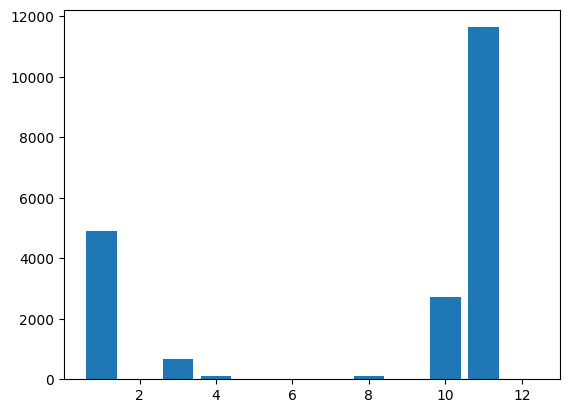

In [4]:
col_list = ["frame_number","identity_number","left","top","width","height","score","class","visibility"]
path = os.path.join(os.getcwd(), "gt.txt")
data = pd.read_csv(path, names=col_list)
print(data)
plt.figure()
plt.bar(data["class"].unique(), data["class"].value_counts())
# sns.countplot(data["class"])

In [24]:
car = data[data["class"] == 3]

video_path = os.path.join(os.getcwd(), "video1.mp4") 

cap = cv2.VideoCapture(video_path)

id1 = 29

numberOfImage = np.max(data["frame_number"])
fps = 25
bound_box_list = []

for i in range(numberOfImage-1):

    ret, frame = cap.read()
    if ret:

        frame = cv2.resize(frame, (960, 540))

        filter_id1 = np.logical_and(car["frame_number"]== i+1, car["identity_number"]==id1)

        if len(car[filter_id1]) != 0:

            x = int(car[filter_id1].left.values[0]/2)
            y = int(car[filter_id1].top.values[0]/2)
            w = int(car[filter_id1].width.values[0]/2)
            h = int(car[filter_id1].height.values[0]/2)
            print("x, ,y, w, h", x, y, w, h)

            cv2.rectangle(frame, (x, y), (x+w, y+h), (0, 255, 0), 2)
            cv2.circle(frame, (int(x+w/2), int(y+h/2)), 2, (0, 255, 0), -1)

            bound_box_list.append([i, x,y,w,h,int(x+w/2), int(y+h/2)])
        
        cv2.putText(frame, "Frame: " + str(i+1), (10, 30), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 0), 2)
        cv2.imshow("Frame", frame)

        if cv2.waitKey(1) & 0xFF == ord("q"):
            break
        # else:
        #     break

cap.release()
cv2.destroyAllWindows()



x, ,y, w, h 477 274 40 31
x, ,y, w, h 477 272 41 31
x, ,y, w, h 478 273 41 32
x, ,y, w, h 478 274 41 32
x, ,y, w, h 479 275 42 32
x, ,y, w, h 480 280 42 32
x, ,y, w, h 481 277 42 33
x, ,y, w, h 481 281 42 33
x, ,y, w, h 480 281 43 33
x, ,y, w, h 480 282 43 34
x, ,y, w, h 479 280 44 34
x, ,y, w, h 479 278 44 34
x, ,y, w, h 479 277 44 34
x, ,y, w, h 479 277 44 35
x, ,y, w, h 480 277 45 35
x, ,y, w, h 480 278 45 35
x, ,y, w, h 480 278 45 35
x, ,y, w, h 480 279 45 36
x, ,y, w, h 480 279 46 36
x, ,y, w, h 480 280 45 36
x, ,y, w, h 480 280 46 36
x, ,y, w, h 480 281 46 36
x, ,y, w, h 480 281 46 36
x, ,y, w, h 481 282 46 37
x, ,y, w, h 481 283 47 37
x, ,y, w, h 481 284 47 38
x, ,y, w, h 481 286 48 38
x, ,y, w, h 481 287 49 39
x, ,y, w, h 481 289 49 39
x, ,y, w, h 481 290 49 39
x, ,y, w, h 481 292 49 39
x, ,y, w, h 481 294 49 39
x, ,y, w, h 480 287 49 39
x, ,y, w, h 481 289 52 39
x, ,y, w, h 481 286 51 40
x, ,y, w, h 482 283 50 41
x, ,y, w, h 481 282 51 41
x, ,y, w, h 481 282 51 41
x, ,y, w, h 

Takip Algoritmaları

* Boosting (BUNU KULLANACAĞIZ)
* TLD
* MEDIANFLOW
* MOSSE
* CSRT
* KCF
* MIL


Tracker: boosting
Track metodu:  boosting
Time:  23.612110376358032
Number of frame tı track (gt):  451
Number of frame to track (track success):  54
Toplam Hata:  960.0


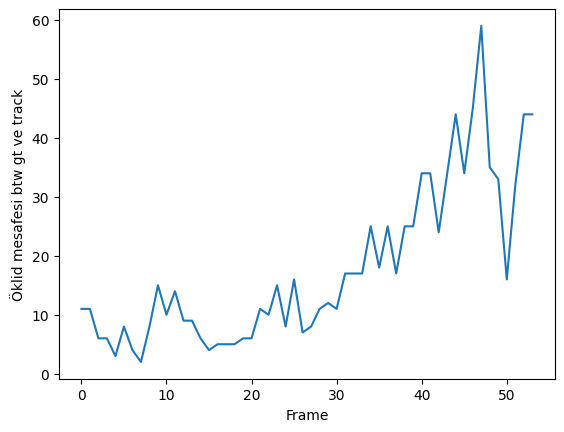

In [8]:
import cv2
import cv2.legacy
import numpy as np
import matplotlib.pyplot as plt
import time
import pandas as pd

OPENCV_OBJECT_TRACKERS = {
                        "boosting"  : cv2.legacy.TrackerBoosting_create,
                        "csrt"      : cv2.legacy.TrackerCSRT_create,
		                "kcf"       : cv2.legacy.TrackerKCF_create,
		                  
		                "mil"       : cv2.legacy.TrackerMIL_create,
		                "tld"       : cv2.legacy.TrackerTLD_create,
		                "medianflow": cv2.legacy.TrackerMedianFlow_create,
		                "mosse"     : cv2.legacy.TrackerMOSSE_create
                        }

tracker_name = "boosting"
tracker = OPENCV_OBJECT_TRACKERS[tracker_name]()
# tracker = cv2.TrackerBoosting_create()
print("Tracker:", tracker_name)

gt = pd.read_csv(os.path.join(os.getcwd(), "gt.txt"))

video_path = os.path.join(os.getcwd(), "video1.mp4")

cap = cv2.VideoCapture(video_path)

#Genel Parametreler

initBB = None
fps = 25
frame_number = []
f = 0
success_track_success = 0
track_list = []
start_time = time.time()

while True:
    time.sleep(0.1)
    ret, frame = cap.read()

    if ret:

        frame = cv2.resize(frame, (960, 540))
        (H,W) = frame.shape[:2]

        car_gt = gt[gt.frame_no == f]
        if len(car_gt) != 0:
            x = car_gt.x.values[0]
            y = car_gt.y.values[0]
            w = car_gt.w.values[0]
            h = car_gt.h.values[0]

            center_x = car_gt.center_x.values[0]
            center_y = car_gt.center_y.values[0]

            cv2.rectangle(frame, (x,y), (x+w, y+h), (0, 255, 0), 2)
            cv2.circle(frame, (center_x, center_y), 2, (0, 0, 255), -1)
        
        # Box
        if initBB is not None:
            (succes, box) = tracker.update(frame)

            (x,y,w,h) = [int(i) for i in box]

            cv2.rectangle(frame, (x,y), (x+w, y+h), (0, 255, 0), 2)
            success_track_success += 1
            track_center_x = int(x+w/2)
            track_center_y = int(y+h/2)
            track_list.append([f, track_center_x, track_center_y])
            info = [("Tracker", tracker_name), ("Success", "Yes" if succes else "No"), ("FPS", fps)]
            for (i, (o, p)) in enumerate(info):
                text = "{}: {}".format(o, p)
                cv2.putText(frame, text, (10, (i*20)-10), cv2.FONT_HERSHEY_SIMPLEX, 0.6, (0, 0, 255), 2)

        cv2.putText(frame, "Frame: " + str(f), (10, 30), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 0), 2)
        cv2.imshow("Frame", frame)
        # key
        key = cv2.waitKey(1) & 0xFF

        if key == ord("q"):
            break
        elif key  == ord("t"):
            initBB = cv2.selectROI("Frame", frame, fromCenter=False)
            tracker.init(frame, initBB)
    
        frame_number.append(f)
        f += 1

    else:
        break

cap.release()
cv2.destroyAllWindows()

end_time = time.time()

time_diff = end_time - start_time

# değerlendirme

track_df = pd.DataFrame(track_list, columns=["frame_number", "center_x", "center_y"])

if len(track_df) != 0:
    print("Track metodu: ", tracker_name)
    print("Time: ", time_diff)
    print("Number of frame tı track (gt): ", len(gt))
    print("Number of frame to track (track success): ", success_track_success)

    #gt ve track  değerleri içinde merkezler çekilir 
    track_df_frame = track_df.frame_number
    gt_center_x = gt.center_x[track_df_frame].values
    gt_center_y = gt.center_y[track_df_frame].values

    track_df_center_x = track_df.center_x.values
    track_df_center_y = track_df.center_y.values

    plt.plot(np.sqrt(gt_center_x-track_df_center_x)**2 + (gt_center_y-track_df_center_y)**2) # hata hesaplama 
    plt.xlabel("Frame")
    plt.ylabel("Öklid mesafesi btw gt ve track")
    error = np.sum(np.sqrt(gt_center_x-track_df_center_x)**2 + (gt_center_y-track_df_center_y)**2)
    print("Toplam Hata: ", error)


Çoklu Takip uygulaması

In [ ]:
import cv2


OPENCV_OBJECT_TRACKERS = {
                        "boosting"  : cv2.legacy.TrackerBoosting_create,
                        "csrt"      : cv2.legacy.TrackerCSRT_create,
		                "kcf"       : cv2.legacy.TrackerKCF_create,
		                  
		                "mil"       : cv2.legacy.TrackerMIL_create,
		                "tld"       : cv2.legacy.TrackerTLD_create,
		                "medianflow": cv2.legacy.TrackerMedianFlow_create,
		                "mosse"     : cv2.legacy.TrackerMOSSE_create
                        }

tracker_name = "kcf"

trackers = cv2.MultiTracker_create()
video_path = os.path.join(os.getcwd(), "MOT17-04-DPM.mp4")                                                        
cap = cv2.VideoCapture(video_path)

fps = 30
f = 0

while True:
    ret, frame  = cap.read()
    (H, W) = frame.shape[:2]
    frame  = cv2.resize(frame, (960, 540))

    (succes, boxes)= trackers.update(frame)

    info = [("Tracker", tracker_name), ("Success", "Yes" if succes else "No"), ("FPS", fps)]

    string_text = ""

    for (i, (o,p)) in enumerate(info):
        text = "{}: {}".format(o,p)
        cv2.putText(frame, text, (10, (i*20)-10), cv2.FONT_HERSHEY_SIMPLEX, 0.6, (0, 0, 255), 2)

    cv2.imshow("Frame", frame)
    key = cv2.waitKey(1) & 0xFF

    if key == ord("q"):
        break
    elif key == ord("t"):
        box = cv2.selectROI("Frame", frame, fromCenter=False)
        tracker = OPENCV_OBJECT_TRACKERS[tracker_name]()
        trackers.add(tracker, frame, box)

    f = f + 1
cap.release()
cv2.destroyAllWindows()    


    
